In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
#Importing Libraries

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go

# Make plotly work with Jupyter notebook
init_notebook_mode(connected = True)

df=pd.read_csv("fpl_data.csv")
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [2]:
#dropping unwanted columns
df1=df.drop(['position_cat','page_views','region','new_foreign','age_cat'], axis=1)


In [3]:
df1.head()

,name,club,age,position,market_value,fpl_value,fpl_sel,fpl_points,nationality,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,65.0,12.0,17.10%,264,Chile,1,1,0
1,Mesut Ozil,Arsenal,28,AM,50.0,9.5,5.60%,167,Germany,1,1,0
2,Petr Cech,Arsenal,35,GK,7.0,5.5,5.90%,134,Czech Republic,1,1,0
3,Theo Walcott,Arsenal,28,RW,20.0,7.5,1.50%,122,England,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,22.0,6.0,0.70%,121,France,1,1,0


In [4]:
df=df1

In [5]:
df.head()

,name,club,age,position,market_value,fpl_value,fpl_sel,fpl_points,nationality,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,65.0,12.0,17.10%,264,Chile,1,1,0
1,Mesut Ozil,Arsenal,28,AM,50.0,9.5,5.60%,167,Germany,1,1,0
2,Petr Cech,Arsenal,35,GK,7.0,5.5,5.90%,134,Czech Republic,1,1,0
3,Theo Walcott,Arsenal,28,RW,20.0,7.5,1.50%,122,England,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,22.0,6.0,0.70%,121,France,1,1,0


In [6]:
df1.head()

,name,club,age,position,market_value,fpl_value,fpl_sel,fpl_points,nationality,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,65.0,12.0,17.10%,264,Chile,1,1,0
1,Mesut Ozil,Arsenal,28,AM,50.0,9.5,5.60%,167,Germany,1,1,0
2,Petr Cech,Arsenal,35,GK,7.0,5.5,5.90%,134,Czech Republic,1,1,0
3,Theo Walcott,Arsenal,28,RW,20.0,7.5,1.50%,122,England,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,22.0,6.0,0.70%,121,France,1,1,0


In [7]:
positions=df1.position.unique() 

In [8]:
for i in positions:
    print(i)

LW
AM
GK
RW
CB
RB
CF
LB
DM
RM
CM
SS
LM


In [9]:
'''this is a newly added column which gives a better estimate of a player's 
valuability based on points scored and the value of the player'''



df1['fpl_ratio'] = pd.DataFrame(df1['fpl_points']/df1['fpl_value'])

In [10]:
df1.head()

,name,club,age,position,market_value,fpl_value,fpl_sel,fpl_points,nationality,club_id,big_club,new_signing,fpl_ratio
0,Alexis Sanchez,Arsenal,28,LW,65.0,12.0,17.10%,264,Chile,1,1,0,22.000000
1,Mesut Ozil,Arsenal,28,AM,50.0,9.5,5.60%,167,Germany,1,1,0,17.578947
2,Petr Cech,Arsenal,35,GK,7.0,5.5,5.90%,134,Czech Republic,1,1,0,24.363636
3,Theo Walcott,Arsenal,28,RW,20.0,7.5,1.50%,122,England,1,1,0,16.266667
4,Laurent Koscielny,Arsenal,31,CB,22.0,6.0,0.70%,121,France,1,1,0,20.166667


In [11]:
'''transform the datatype of fpl_selection and convert the string into numeric data 
(makes the data easier to use by converting into numeric data)'''


df['fpl_sel'] = df['fpl_sel'].replace('%','',regex=True).astype('float')/100
df.head()

,name,club,age,position,market_value,fpl_value,fpl_sel,fpl_points,nationality,club_id,big_club,new_signing,fpl_ratio
0,Alexis Sanchez,Arsenal,28,LW,65.0,12.0,0.171,264,Chile,1,1,0,22.000000
1,Mesut Ozil,Arsenal,28,AM,50.0,9.5,0.056,167,Germany,1,1,0,17.578947
2,Petr Cech,Arsenal,35,GK,7.0,5.5,0.059,134,Czech Republic,1,1,0,24.363636
3,Theo Walcott,Arsenal,28,RW,20.0,7.5,0.015,122,England,1,1,0,16.266667
4,Laurent Koscielny,Arsenal,31,CB,22.0,6.0,0.007,121,France,1,1,0,20.166667


In [12]:
#under the premier league, all these nationalities are considered to be a part of "United Kingdom"
df1=df1.replace("Northern Ireland","United Kingdom")
df1=df1.replace("England","United Kingdom")
df1=df1.replace("Wales","United Kingdom")
df1=df1.replace("Scotland","United Kingdom")

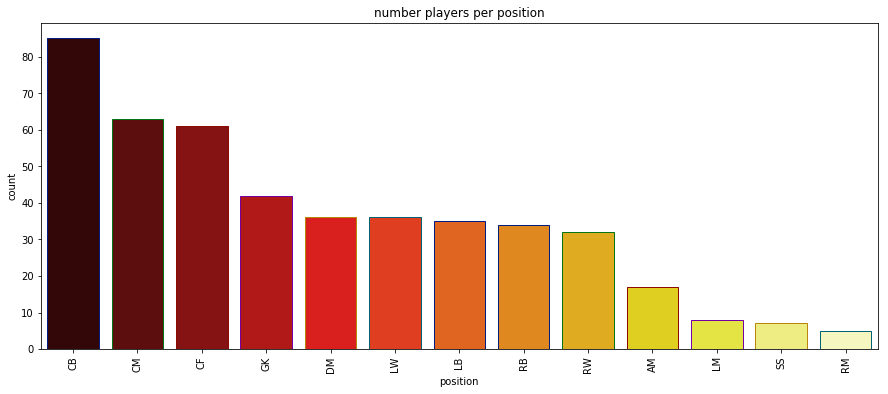

In [13]:
#number players per position present in the league
plt.subplots(figsize=(15,6))
sns.countplot('position',data=df,palette='hot',edgecolor=sns.color_palette('dark',7),order=df1['position'].value_counts().index)
plt.xticks(rotation=90)
plt.title('number players per position')
plt.show()

In [15]:
df1=df1.replace("N%27Golo Kante","NGolo Kante")

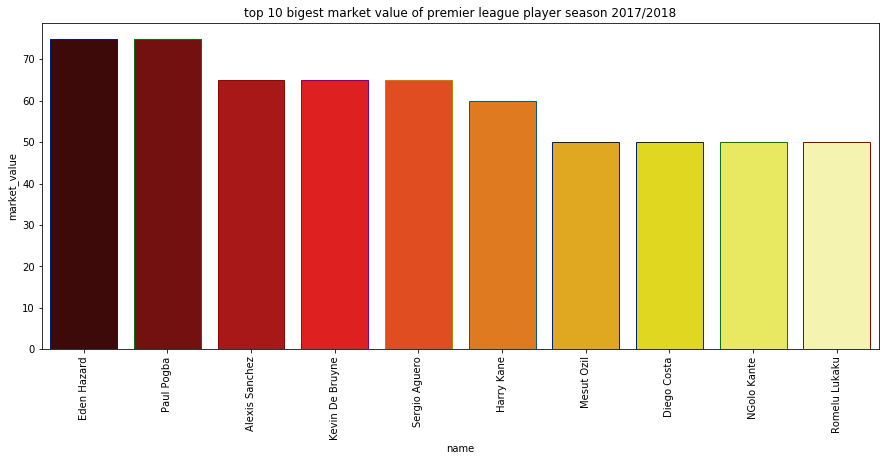

In [16]:
#Players with the highest market value in the football world
dfmarketv = df1.nlargest(10, 'market_value').sort_values('market_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="market_value",  data=dfmarketv ,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 bigest market value of premier league player season 2017/2018')
plt.show()

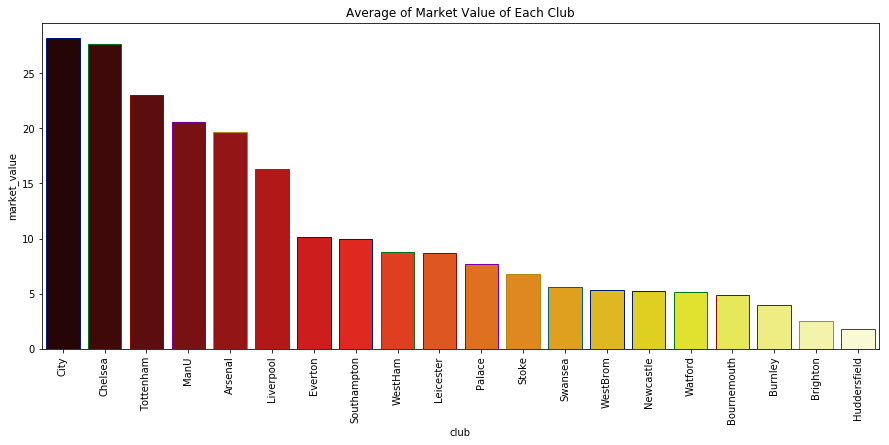

In [17]:
#Average market value of each club 
df_meanmv=pd.DataFrame(df1.groupby(['club'])['market_value'].mean()).reset_index().sort_values('market_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="club", y="market_value",data=df_meanmv,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Average of Market Value of Each Club')
plt.show()

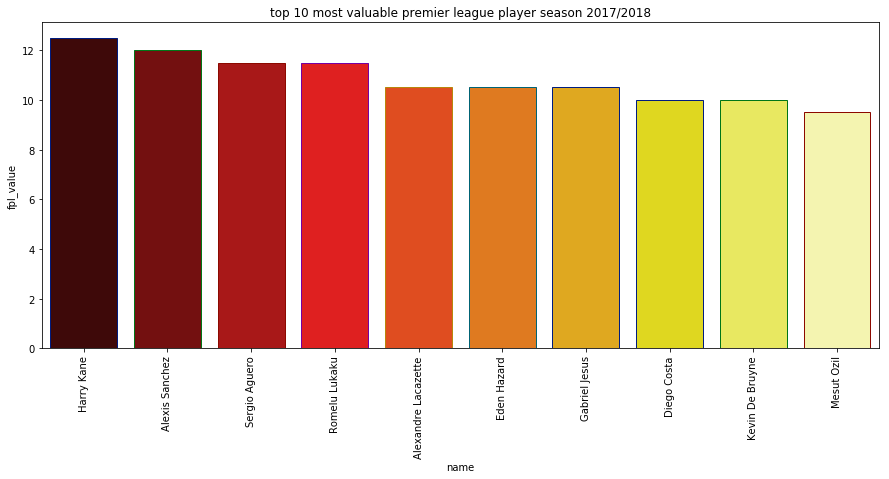

In [18]:
#fpl 10 most valuable player
dfview = df1.nlargest(10, 'fpl_value').sort_values('fpl_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="fpl_value",  data=dfview ,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 most valuable premier league player season 2017/2018')
plt.show()

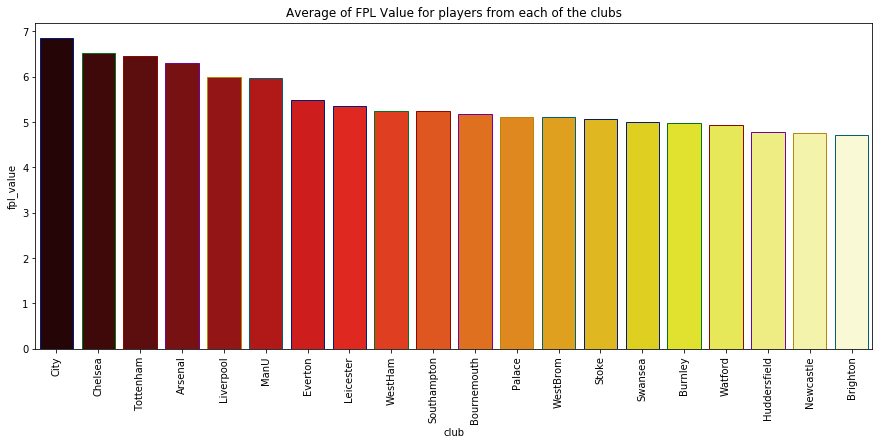

In [19]:
#Average fpl value of each club
df_meanfv=pd.DataFrame(df1.groupby(['club'])['fpl_value'].mean()).reset_index().sort_values('fpl_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="club", y="fpl_value",data=df_meanfv,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Average of FPL Value for players from each of the clubs')
plt.show()

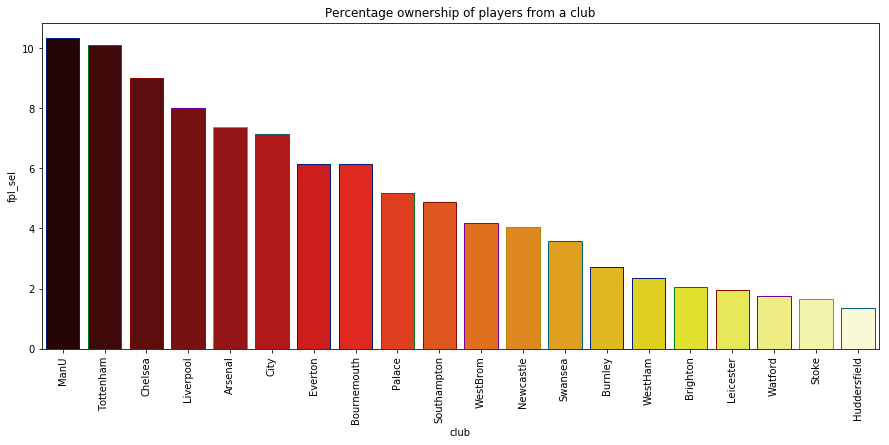

In [20]:
#percentage of players selected in fpl from each club
df_meanfs=pd.DataFrame(df1.groupby(['club'])['fpl_sel'].sum()/0.14956).reset_index().sort_values('fpl_sel',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="club", y="fpl_sel",data=df_meanfs,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Percentage ownership of players from a club')
plt.show()


In [21]:
clubs = tuple(set(df1['club']))
print(clubs)

('Arsenal', 'Stoke', 'Swansea', 'WestHam', 'City', 'Bournemouth', 'Southampton', 'Burnley', 'Chelsea', 'Newcastle', 'Watford', 'WestBrom', 'ManU', 'Liverpool', 'Palace', 'Leicester', 'Brighton', 'Huddersfield', 'Tottenham', 'Everton')


In [23]:
value = []
for club in clubs:
    value.append(sum(df1['market_value'].loc[df1['club']==club]))

In [25]:
keys= clubs
values=value

iplot({
    "data": [go.Bar(x=keys, y=values)],
    "layout": go.Layout(title="Market Value of players of each club")
})

In [26]:
average_age = []
for club in clubs:
    average_age.append(np.mean(df1['age'].loc[df1['club']==club]))


In [27]:
keys= clubs
values=average_age

iplot({
    "data": [go.Bar(x=keys, y=values)],
    "layout": go.Layout(title="Average Age")
})

In [29]:
country, counts = np.unique(df1['nationality'], return_counts=True)

In [30]:
keys= country
values=counts

iplot({
    "data": [go.Bar(x=keys, y=values)],
    "layout": go.Layout(title="Nationality of Players")
})

# Mean market value of players with respect to age shows the ideal age of players at which they become highly bankable

In [31]:
ages = tuple(set(df1['age']))
age_value_mean = []
for age in ages:
    age_value_mean.append(np.mean(df1['market_value'].loc[df1['age']==age]))

In [32]:
keys= ages
values=age_value_mean

iplot({
    "data": [go.Bar(x=keys, y=values)],
    "layout": go.Layout(title="Mean Market Value vs Age")
})

# The following representation is that of the average market value of players based on the positions they play in, helping us to know what positions have great demand

In [34]:
positions, p_counts = np.unique(df1['position'], return_counts=True)
position_value_mean = []

for p in positions:
    position_value_mean.append(np.mean(df1['market_value'].loc[df1['position']==p]))
    

In [35]:
keys= positions
values=position_value_mean

iplot({
    "data": [go.Bar(x=keys, y=values)],
    "layout": go.Layout(title="Mean Market Value vs Position")
})